# Importing the Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pre-Processing

#  1)Importing the Dataset

In [2]:
df=pd.read_csv('Admission_Predict_Ver1.1.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


# 2) Exploratory Data Analysis

In [3]:
df.shape   # finding shape of your dataset

(500, 9)

In [4]:
df.info()   # finding information about your dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.head()    # to get an idea about the dataset by printing first 4 values

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.drop('Serial No.',axis=1,inplace=True)    # Droping the serial no. column  as it is not required for predicting
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [7]:
df.isna().sum()   # finding missing values in the dataset

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Visualization

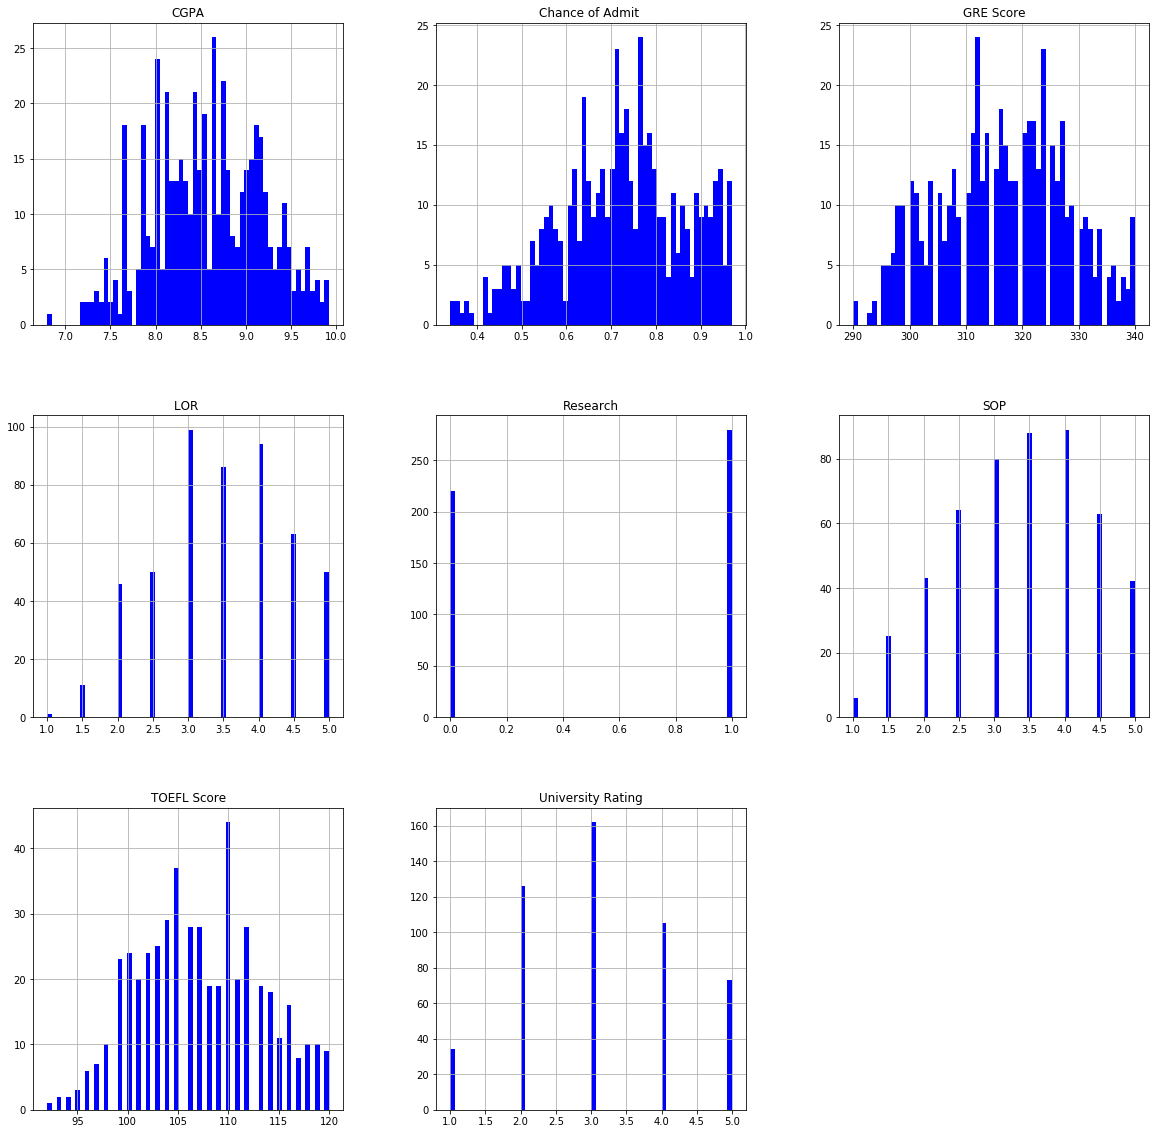

In [8]:
df.hist(bins = 60 , figsize = (20,20),color ='b')  # we can check histogram to find outliers and for visualization
plt.show()

# Data pre-processing

In [9]:
x=df.iloc[:,:-1].values    # extracting the dataset into x and y column
y=df.iloc[:,-1].values


# Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

# using PCA(Principle Compnent Analysis)

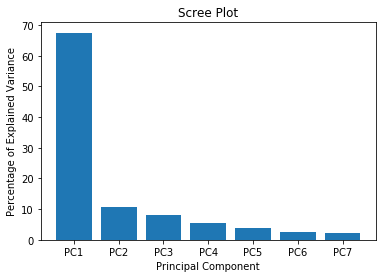

In [11]:
from sklearn.decomposition import PCA
pca=PCA()
x=pca.fit_transform(x)
PVE=pca.explained_variance_ratio_
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [12]:
pca=PCA(n_components=2)
x=pca.fit_transform(x)


# Using RFR to Create Model

In [13]:
from sklearn.model_selection import train_test_split       # splitting the data into test set and train set
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.3,random_state=0)

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
reg=RandomForestRegressor(n_estimators=9,random_state=26)
reg.fit(x_tr,y_tr)
y_pred=reg.predict(x_te)
mae=mean_absolute_error(y_pred,y_te)                                    
mse=mean_squared_error(y_pred,y_te)
rmse=np.sqrt(mse)
scr=r2_score(y_te,y_pred)
print('Mean Absolute Error:       ',mae)
print('Mean Squared Error:        ',mse)
print('Root Mean Squared Error:   ',rmse)
print('Accuracy Score:            ',scr)

Mean Absolute Error:        0.05139999999999998
Mean Squared Error:         0.0050285020576131675
Root Mean Squared Error:    0.0709119317013235
Accuracy Score:             0.7243901311256142


# Visualizing the output

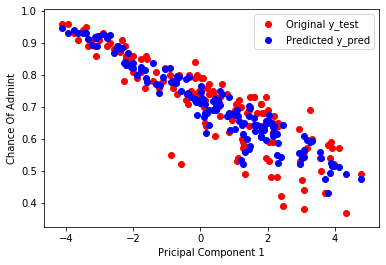

In [15]:
plt.scatter(x_te[:,0],y_te,c='red',label = 'Original y_test')
plt.scatter(x_te[:,0],y_pred,c='blue',label = 'Predicted y_pred')     # plotting the test data and predicted data
plt.ylabel("Chance Of Admint")
plt.xlabel("Pricipal Component 1")
plt.legend()
plt.show()


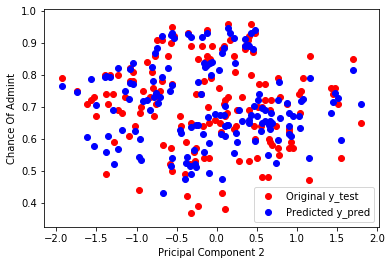

In [16]:
plt.scatter(x_te[:,1],y_te,c='red',label = 'Original y_test')
plt.scatter(x_te[:,1],y_pred,c='blue',label = 'Predicted y_pred')     # plotting the test data and predicted data
plt.ylabel("Chance Of Admint")
plt.xlabel("Pricipal Component 2")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


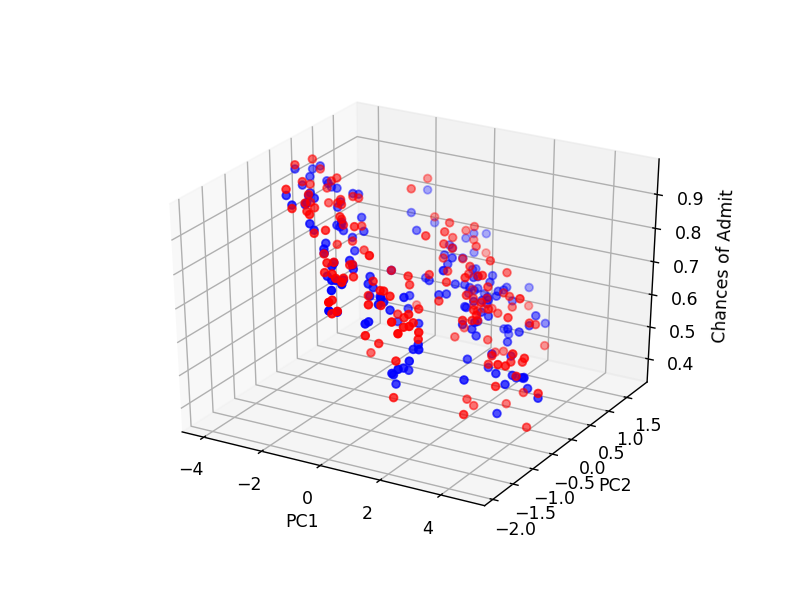

In [17]:
from mpl_toolkits import mplot3d
%matplotlib notebook
ax=plt.figure().add_subplot(projection='3d')
ax.scatter3D(x_te[:,0],x_te[:,1],y_te,c='red')
ax.scatter(x_te[:,0],x_te[:,1],y_pred,c='blue')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('Chances of Admit')
plt.show()